# BALC cleaning 
## Subset: CEPA files 

2019.02.08 — 2019.02.21

## Summary of code
- Created a corpus dictionary with the file name, original text, and perceived level of proficiency
- Initial set up of cepa_df based off the corpus dictionary, which included
    - Filenames
    - Original Text
- Cleaning up the text for cepa_df by making:
    - A "Normalized" Text with standardized tagging (if applicable)
    - A "Revised" Essay, which removes student correction tags and removes crossed out text
- Building up cepa_df with: 
    - Tokenized essays (built off of the revised essay)
    - Token counts
    - TTR count
- Making sure everything read in correctly
- Visualizing a bit of data about the various levels (token_count, TTR)

### Initial set-up

In [1]:
import pandas as pd
import numpy as np
import pickle
import nltk
import glob
import re

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pprint            # to turn off pretty printing

Pretty printing has been turned OFF


In [2]:
cor_dir = "../private/BUiD Arab Learner Corpus v.1/total/"
corpus = glob.glob(cor_dir+'*.txt')
corpus[:5]

['../private/BUiD Arab Learner Corpus v.1/total/CEPA 3 200607296.txt', '../private/BUiD Arab Learner Corpus v.1/total/CEPA 4 200607457.txt', '../private/BUiD Arab Learner Corpus v.1/total/CEPA 5 200600487.txt', '../private/BUiD Arab Learner Corpus v.1/total/CEPA 4 200608016.txt', '../private/BUiD Arab Learner Corpus v.1/total/CEPA 1 200611825.txt']

There are some duplicates in the total folder, which I'm using for the corpus root. However, I was able to locate the correctly labeled files (`clean_files`) in the CEPA Images folder, where all the original handwritten essays are located. Therefore, during my exploration of the corpus, I picked the duplicated (`bad_files`) as well as the clean files. I'll be using these two variables to point in the correct direction, so that we don't have essays incorrectly labeled.

In [3]:
# Opening the pickle files that have the problem files and clean files
f_in = open("duplicated_files.pickle","rb")
bad_files = pickle.load(f_in)
f_in.close()

f_in = open("clean_files.pickle","rb")
clean_files = pickle.load(f_in)
f_in.close()

bad_files
clean_files

['200607856', '200607880', '200607857', '200607777', '200607875', '200607861', '200607902', '200607910', '200612324', '200611115', '200621158', '200619773']

['../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607777.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607856.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607880.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607857.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200612324.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607902.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607861.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607875.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607910.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/3/200611115.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/6/200621158.jpg', '../private/BUiD Arab Learner Corpus v.1/CEPA Images/6/200619773.jpg']

In [4]:
# Making sure the code will pull the correct file for the duplicated files -- we're reading from /total/, but we can get the nececssary information from these filenames
for item in clean_files:
    if any(search in item for search in bad_files):
        print("use:", item)

use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607777.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607856.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607880.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607857.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200612324.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607902.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607861.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607875.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/2/200607910.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/3/200611115.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/6/200621158.jpg
use: ../private/BUiD Arab Learner Corpus v.1/CEPA Images/6/200619773.jpg


In [5]:
# setting up a cepa dict
corpus = glob.glob(cor_dir+'*.txt')
corpus_dict = {}
for file in corpus:
    start = file.rindex('/')+1
    name = file[start:-4]
    x = re.findall(r'^((C|c).*?\d{3,}( -)?)', name)   # I'm really only interested in the cepa files for now
    if len(x) > 0:
            x = x[0][0].split()
            if x[-1] not in bad_files:  # duplicated files - ignoring them for now, will put in a separate dict and concatenate
                f = open(file, encoding='utf-8-sig')   # fixes \ufeff code at beginning of strings
                txt = f.read()
                f.close()
                corpus_dict[x[-1]] = {"Level": x[1], "Text": txt}
len(corpus_dict.keys())

1652

In [6]:
corpus_dict["200601970"]

{'Level': '1', 'Text': '\t\t\t\tCEPA 1 200601970\n\n\n\nYou have just had the perfect holiday you went Yaman There go <o>my  father and my brather. You</o> saw and did hadr<o>a</o> mot and sanaa moll. It was so wonderful m<o>y</o> famely\n'}

In [7]:
corpus_dict["200600215"]["Level"]

'5'

In [8]:
corpus_dict["200600677"]

{'Level': '1', 'Text': '\t\t\t\tCEPA 1 200600677\n\n\n\nshe have just ha<o>d</o> the perfect. went go to the Da<o>bia</o>. Dabia is the dviring, and is vere <o>Fantastc</o> went my Frinds and Famly. He will go in the Ibn batota, and swimming. The swimming Dabia saw vere Fantastc and dviring. and it’s going in the <o>cin</o>ema Dabia. \n'}

In [9]:
# This is for the bad files. There should be twelve of them!
mini = {}
for item in clean_files:
    if any(search in item for search in bad_files):
        x = re.findall(r'\d/\d+', item)   # gets the level (/\d/) and the file (\d+) information
        x = x[0]
        x = x.split('/')
        fn = cor_dir+"CEPA "+str(x[0])+" "+str(x[1])+".txt"
        print(x, fn)
        f = open(fn, encoding='utf-8-sig')
        txt = f.read()
        f.close()
        mini[x[1]] = {"Level": x[0], "Text": txt}
len(mini.keys())
mini['200607777']["Text"]

['2', '200607777'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200607777.txt
['2', '200607856'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200607856.txt
['2', '200607880'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200607880.txt
['2', '200607857'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200607857.txt
['2', '200612324'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200612324.txt
['2', '200607902'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200607902.txt
['2', '200607861'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200607861.txt
['2', '200607875'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200607875.txt
['2', '200607910'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 2 200607910.txt
['3', '200611115'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 3 200611115.txt
['6', '200621158'] ../private/BUiD Arab Learner Corpus v.1/total/CEPA 6 200621158.txt
['6', '200619773'] ../private/BUiD Arab Learner Corpus

12

'\t\t\t\tCEPA 2 200607777\n\n\n\nThe perfet holiday in UAE. You went suren cantres to one holiday. went with you me sister and mather. I’m see in Abu Dhabie “shate alraha” is a very nice sea and I went “Al maryna moll”. alfter is going to AlAin. it very nice, I went “  Mouten of hafied” and “mobazar AlKadra”. In Dubai went to the “meina salam” and “almaha” is a nice hotiel in Dubai. In RAK is go in masafi and see the water of masafi. wheth alfugaira isvery nise cantry because is have more of mouten”\nThe ajnan amalguin is avery smoler than save cantres. it was so wonderful because I’m going xxx with father and sister. went to sven emarit. I’m very happey to see emarat in  one holiday.\n'

In [10]:
# Concatenating corpus_dict and mini, making sure they have the right amount of keys
z = {**corpus_dict, **mini}
len(z.keys())

1664

In [11]:
# Setting up the df
cepa_df = pd.DataFrame(list(corpus_dict.keys()), columns={"Filename"})
cepa_df.shape
cepa_df.head()

(1652, 1)

,Filename
0,200607296
1,200607457
2,200600487
3,200608016
4,200611825


In [12]:
# UDFs to get the level and the original text
def get_level(file):
    return z[file]["Level"]

def get_text(file):
    return z[file]["Text"]

In [13]:
cepa_df["Level"] = cepa_df.Filename.apply(get_level)
cepa_df["Original_Text"] = cepa_df.Filename.apply(get_text)
cepa_df.head()

,Filename,Level,Original_Text
0,200607296,3,\t\t\t\tCEPA 3 200607296\n\n\n\nNow I tell you...
1,200607457,4,\t\t\t\tCEPA 4 200607457\n\n\n\n ...
2,200600487,5,\t\t\t\tCEPA 5 200600487\n\n\n\n\nEvery body i...
3,200608016,4,\t\t\t\tCEPA 4 200608016\n\n\n\nEvery body hav...
4,200611825,1,\t\t\t\tCEPA 1 200611825\n\n\n\nyou go in the ...


#### Cleaning data up
- Remove excessive whitespace
- Remove things like curly quotes 
- Standardize tagging
    - `<o>...</o>` -> `_`
    - `<i>...</i>` -> `^`

In [14]:
# Making UDFs to clean up data a bit
def clean_text(txt):
    """Removes excessive whitespace, backticks, and curly quotes from a text."""
    txt = re.sub(r'[\n\t ]+', ' ', txt)
    txt = re.sub(r'^`', '', txt)
    txt = txt.replace('“','"').replace('”','"').replace("’", "'")
    txt = txt.strip()
    return txt

def retag(essay):
    """Replaces tags for student emphasis (<o>, </o>)with '_' and removes any unecessary spaces between emphasized 
    letters in words. Replaces tags for student insertions (<i>, </i>) with ^ and removes any unecessary spaces 
    between letters in inserted words. Closes any student tags that were left open by researchers."""
    essay = re.sub(r'\<i +', '<i>', essay)
    essay = re.sub(r'<x +', '<x>', essay)
    essay = re.sub(r'<o +', '<o>', essay)
    essay = re.sub(r'<o>(\s)?', '_', essay)
    essay = re.sub(r'(\s)?<\/o>', '_', essay)
    essay = re.sub(r'<i>(\s)?', '^', essay)
    essay = re.sub(r'(\s)?<\/i>', '^', essay)
    essay = re.sub(r' >', ' ', essay)
#    essay = re.sub(r'__', '_ _', essay)
    return essay

def un_head(txt):
    """Removes headers from text that include the file name, as well as student's names, grades, schools, etc."""
    cepa = re.compile(r'^C(EPA|EPa|epa)')      # removes cepa headers
    if cepa.search(txt):
        txt = re.sub(r'CEPA.*?\d{2,}( ?-)?', '', txt, flags=re.I)   # there was one file that was CEPA ! filename
    return txt

def normalize_essay(txt):
    txt = clean_text(txt)
    txt = retag(txt)
    txt = un_head(txt)
    txt = txt.strip()
    return txt

Now let's check the UDFs out to make sure they work!

In [15]:
# Original file
cepa_df.Original_Text[137]

'\t\t\t\tCEPA 1 2006625\n\n\n\nwhat the activity is to ideas and to Play foot ball in the clamp and see to manh in T.V of foot ball Games Iam we play move foor ball in the zoo with may fired XXX I paly in the\nFradey <o>a</o>t 4 coclek is too storing of tham am and to ray ferar<o>d</o>e  in the Zoo as behtFele sprts in any am and I go may fired to see foot ball in clarp in LAwqL Calmp Iam more afeh see footpall amy fired and go to the coFe see foot ball an gierk to cof and wentes and go to may clamp see may pephel play fotb<o>a</o>ll im clamp and me I kan paly more Gams in the comfotre Games\nin cold places they culive by living with humans.\n'

In [16]:
# Cleaning it
clean_text(cepa_df.Original_Text[137])

'CEPA 1 2006625 what the activity is to ideas and to Play foot ball in the clamp and see to manh in T.V of foot ball Games Iam we play move foor ball in the zoo with may fired XXX I paly in the Fradey <o>a</o>t 4 coclek is too storing of tham am and to ray ferar<o>d</o>e in the Zoo as behtFele sprts in any am and I go may fired to see foot ball in clarp in LAwqL Calmp Iam more afeh see footpall amy fired and go to the coFe see foot ball an gierk to cof and wentes and go to may clamp see may pephel play fotb<o>a</o>ll im clamp and me I kan paly more Gams in the comfotre Games in cold places they culive by living with humans.'

In [17]:
# Un-heading the cleaned file
un_head(clean_text(cepa_df.Original_Text[137]))

' what the activity is to ideas and to Play foot ball in the clamp and see to manh in T.V of foot ball Games Iam we play move foor ball in the zoo with may fired XXX I paly in the Fradey <o>a</o>t 4 coclek is too storing of tham am and to ray ferar<o>d</o>e in the Zoo as behtFele sprts in any am and I go may fired to see foot ball in clarp in LAwqL Calmp Iam more afeh see footpall amy fired and go to the coFe see foot ball an gierk to cof and wentes and go to may clamp see may pephel play fotb<o>a</o>ll im clamp and me I kan paly more Gams in the comfotre Games in cold places they culive by living with humans.'

Now let's check `normalize()`. It goes a step farther by retagging the HTML codes. This was giving me a lot of trouble earlier! Sometimes it will link words that shouldn't be linked (e.g. "\_to_do" instead of "\_to_ do".

In [18]:
normalize_essay(cepa_df.Original_Text[15])

'Topic _A_ I will writing this a Prerf in far_mer_ in AlAin, who you were of father and mother and ster You did Planing foot dall . happened to watah camall and ive it was so had XXX Donka you like it so much'

In [19]:
normalize_essay(cepa_df.Original_Text[137])

'what the activity is to ideas and to Play foot ball in the clamp and see to manh in T.V of foot ball Games Iam we play move foor ball in the zoo with may fired XXX I paly in the Fradey _a_t 4 coclek is too storing of tham am and to ray ferar_d_e in the Zoo as behtFele sprts in any am and I go may fired to see foot ball in clarp in LAwqL Calmp Iam more afeh see footpall amy fired and go to the coFe see foot ball an gierk to cof and wentes and go to may clamp see may pephel play fotb_a_ll im clamp and me I kan paly more Gams in the comfotre Games in cold places they culive by living with humans.'

### Expanding on cepa_df
- Normalizing essays with UDFs created in previous section
- Making "Revised_essay", which removes all tagging
- Tokenize
- Token counts
- TTR

In [20]:
cepa_df['Normalized_Essay'] = cepa_df.Original_Text.apply(normalize_essay)
cepa_df.head()

,Filename,Level,Original_Text,Normalized_Essay
0,200607296,3,\t\t\t\tCEPA 3 200607296\n\n\n\nNow I tell you...,Now I tell you why my worst holiday ever in th...
1,200607457,4,\t\t\t\tCEPA 4 200607457\n\n\n\n ...,My worst holiday Last year I have just had the...
2,200600487,5,\t\t\t\tCEPA 5 200600487\n\n\n\n\nEvery body i...,Every body in this life have a favourite posse...
3,200608016,4,\t\t\t\tCEPA 4 200608016\n\n\n\nEvery body hav...,Every body have a lot ofpossessions in this li...
4,200611825,1,\t\t\t\tCEPA 1 200611825\n\n\n\nyou go in the ...,you go in the oman just had the perfect holida...


In [21]:
cepa_df[cepa_df.Normalized_Essay.str.contains(r'_\w{2,}')]

,Filename,Level,Original_Text,Normalized_Essay
0,200607296,3,\t\t\t\tCEPA 3 200607296\n\n\n\nNow I tell you...,Now I tell you why my worst holiday ever in th...
1,200607457,4,\t\t\t\tCEPA 4 200607457\n\n\n\n ...,My worst holiday Last year I have just had the...
3,200608016,4,\t\t\t\tCEPA 4 200608016\n\n\n\nEvery body hav...,Every body have a lot ofpossessions in this li...
9,200611351,3,\t\t\t\tCEPA 3 200611351\n\n\n\nAl_ain mall is...,Al_ain mall is the most beautiful place. First...
15,200603206,1,\n\t\t\t\tCEPA 1 200603206\n\n\n\n Topi...,Topic _A_ I will writing this a Prerf in far_m...
16,200611379,3,\t\t\t\tCEPA 3 200611379\n\n\n\n\nI spend my w...,I spend my weekend in Dubai. I go with my fami...
18,200611190,3,\t\t\t\tCEPA 3 200611190\n\n\n\nThere are many...,There are many things make the worst holiday f...
19,200606353,2,\t\t\t\tCEPA 2 200606353\n\n\n\nI m Love the U...,I m Love the UAE the UAE I am very very Love t...
23,200601400,2,\t\t\t\tCEPA 2 200601400\n\n\n\nI have just ha...,I have just had the worst holiday ever . The h...
24,200601414,2,\t\t\t\tCEPA 2 200601414\n\n\n\n<o>I am go to ...,_I am go to the_sumar holabuy in The Oman in t...


In [22]:
# Yes, we can see "the" and "sumar" are connected in the phrase "I am go in the sumar" 
cepa_df.Normalized_Essay[24]

'_I am go to the_sumar holabuy in The Oman in the Slala in my family the Salala is very haphe and go to The Oman in The car on my calal becoues is not go in the sun and becoues people go in Oman go to the sea and the swming ,eating in Faham beoue_s_ is bleshes food in the brth_a_r in the very nais in the swmming and go the play foot ple and go to the santar in the shoping and go to the Zoo is very naies and becoues in the manke and lion and tor to us in the anmils and go to The hotel go the slep. becous go to in The Famliy is very nais and is very haply'

In [23]:
cepa_df.Original_Text[69]
cepa_df.Normalized_Essay[69]

'\t\t\t\tCEPA 2 200605920\n\n\n\nMy live in the Shajohe, A house is very beautiful, 2 rezens  <i>for righting</i>\nThe houses in the <o>fife</o> romes, I like rome is me .\nFirse, be<x>c</x>uos a beautiful my rome, I like the rome becous the see are me bar play in rome and eat \nSacend,\n'

'My live in the Shajohe, A house is very beautiful, 2 rezens ^for righting^ The houses in the _fife_ romes, I like rome is me . Firse, be<x>c</x>uos a beautiful my rome, I like the rome becous the see are me bar play in rome and eat Sacend,'

In [24]:
# UDF to remove tags -- removes tagging for insertions and emphasis, and removes anything within a cross-out tag
def remove_tags(text):
    """Removes tags from Normalized_Essay. If there are tags indicating a student crossed something out, whatever is 
    enclosed in those tags is removed."""
    text = re.sub(r'<x>.*?<\/x>', '', text)         # delete tags for crossing out and the text in those tags
    text = text.replace('_', '').replace('^', '')   # remove emphasis and insertion tags
    return text

In [25]:
# Remove_tags applied to creat "Revised_Essay"
# Tokenize revised_essay
# Get token count
cepa_df['Revised_Essay'] = cepa_df.Normalized_Essay.apply(remove_tags)
cepa_df['tokens'] = cepa_df.Revised_Essay.apply(nltk.word_tokenize)
cepa_df['token_count'] = cepa_df.tokens.map(len)
cepa_df.sample(15)

,Filename,Level,Original_Text,Normalized_Essay,Revised_Essay,tokens,token_count
646,200612145,2,\t\t\t\tCEPA 2 200612145\n\n\nI think just a h...,I think just a holiday I am going to the deser...,I think just a holiday I am going to the deser...,"[I, think, just, a, holiday, I, am, going, to,...",40
1486,200600259,5,\t\t\t\tCEPA 5 200600259\n\n\n\nI choes to wr...,I choes to write about my favourite posssion. ...,I choes to write about my favourite posssion. ...,"[I, choes, to, write, about, my, favourite, po...",246
513,200610973,1,\t\t\t\tCEPA 1 200610973\n\n\n\nIn summer your...,In summer your go in the Oman you want in Fath...,In summer your go in the Oman you want in Fath...,"[In, summer, your, go, in, the, Oman, you, wan...",155
622,200607398,6,\t\t\t\tCEPA 6 200607398\n\n\n\n (Topic...,(Topic A ) Last month was the worst time of th...,(Topic A ) Last month was the worst time of th...,"[(, Topic, A, ), Last, month, was, the, worst,...",177
1303,200623130,6,\t\t\t\tCEPA 6 200623130\n\n\n\n \t\t...,"Topic A Last summer, I had the oppurtunity to ...","Topic A Last summer, I had the oppurtunity to ...","[Topic, A, Last, summer, ,, I, had, the, oppur...",131
1419,200611164,3,\t\t\t\tCEPA 3 200611164\n\n\n\nThere are many...,There are many dayes I have ^want to^ the holi...,There are many dayes I have want to the holida...,"[There, are, many, dayes, I, have, want, to, t...",187
899,200605835,4,\t\t\t\tCEPA 4 200605835\n\n\n\nI like to the ...,I like to the gardan in the winter becaue the ...,I like to the gardan in the winter becaue the ...,"[I, like, to, the, gardan, in, the, winter, be...",247
210,200607315,5,\t\t\t\tCEPA 5 200607315\n\n\n\nLast Summer I ...,Last Summer I have just had the perfect holida...,Last Summer I have just had the perfect holida...,"[Last, Summer, I, have, just, had, the, perfec...",231
200,200602456,1,\t\t\t\tCEPA 1 200602456\n\n\n\nI watch film i...,I watch film in the T.V o the my fraind called...,I watch film in the T.V o the my fraind called...,"[I, watch, film, in, the, T.V, o, the, my, fra...",53
397,200607475,5,\t\t\t\tCEPA 5 200607475\n\n\n\nOn the summer ...,"On the summer holiday. Just hearing the word ""...","On the summer holiday. Just hearing the word ""...","[On, the, summer, holiday, ., Just, hearing, t...",287


In [26]:
# checking to make sure there are no "cepa" tokens included from incorrect/incomplete heading removal
cepa_df[cepa_df.tokens.apply(lambda x: 'cepa' in [y.lower() for y in x])]

# returns are essays that talk about cepa 

,Filename,Level,Original_Text,Normalized_Essay,Revised_Essay,tokens,token_count
6,200608959,5,\t\t\t\tCEPA 5 200608959\n\n\n\nI have just ha...,I have just had the perfect and the best holid...,I have just had the perfect and the best holid...,"[I, have, just, had, the, perfect, and, the, b...",277
128,200612443,2,\t\t\t\tCEPA 2 200612443\n\n\n\nI’m writing To...,I'm writing Topic B to Describe the best film ...,I'm writing Topic B to Describe the best film ...,"[I, 'm, writing, Topic, B, to, Describe, the, ...",310
237,200611155,3,\t\t\t\tCEPA 3 200611155\n\n\n\nIn the last su...,"In the last summer holiday, I hade the worest ...","In the last summer holiday, I hade the worest ...","[In, the, last, summer, holiday, ,, I, hade, t...",264
812,200612584,2,\t\t\t\tCEPA 2 200612584\n\n\n\nThese weekend ...,These weekend the worst. Because I stayd at ho...,These weekend the worst. Because I stayd at ho...,"[These, weekend, the, worst, ., Because, I, st...",52
1251,200611303,3,\t\t\t\tCEPA 3 200611303\n\n\n\nThere are many...,There are many qualites the worst weekend bad....,There are many qualites the worst weekend bad....,"[There, are, many, qualites, the, worst, weeke...",199
1401,200604402,1,\t\t\t\tCEPA 1 200604402\n\n\n\n<x>me</x> <o>m...,<x>me</x> _my you went ar_wous. went <x>my</x>...,my you went arwous. went and fraund Yor ne...,"[my, you, went, arwous, ., went, and, fraund, ...",43


In [27]:
# Let's get TTR
def get_TTR(toks):
    """All tokens are lowercased, punctuation is included.
    Get TTR by dividing set of lowercased tokens by length of tokens."""
    all_toks = [x.lower() for x in toks]
    if len(all_toks) == 0:   # at least one file has 0 tokens, so I got an error about dividing by zero without this
        return 0
    else: return len(set(all_toks))/len(all_toks)

In [28]:
# checking UDF
foo = "My name is Elena and I am a Junior Linguist. I study applied linguistics, and i want to be a linguist."
get_TTR(foo.split())

0.7619047619047619

In [29]:
# checking UDF by hand
lil = [x.lower() for x in foo.split()]
len(set(lil))/len(lil)

0.7619047619047619

In [30]:
# checking UDF on an empty string
foo = ""
get_TTR(foo)

0

In [31]:
cepa_df['TTR'] = cepa_df.tokens.apply(get_TTR)

In [32]:
cepa_df.head()

,Filename,Level,Original_Text,Normalized_Essay,Revised_Essay,tokens,token_count,TTR
0,200607296,3,\t\t\t\tCEPA 3 200607296\n\n\n\nNow I tell you...,Now I tell you why my worst holiday ever in th...,Now I tell you why my worst holiday ever in th...,"[Now, I, tell, you, why, my, worst, holiday, e...",207,0.492754
1,200607457,4,\t\t\t\tCEPA 4 200607457\n\n\n\n ...,My worst holiday Last year I have just had the...,My worst holiday Last year I have just had the...,"[My, worst, holiday, Last, year, I, have, just...",180,0.572222
2,200600487,5,\t\t\t\tCEPA 5 200600487\n\n\n\n\nEvery body i...,Every body in this life have a favourite posse...,Every body in this life have a favourite posse...,"[Every, body, in, this, life, have, a, favouri...",229,0.445415
3,200608016,4,\t\t\t\tCEPA 4 200608016\n\n\n\nEvery body hav...,Every body have a lot ofpossessions in this li...,Every body have a lot ofpossessions in this li...,"[Every, body, have, a, lot, ofpossessions, in,...",156,0.608974
4,200611825,1,\t\t\t\tCEPA 1 200611825\n\n\n\nyou go in the ...,you go in the oman just had the perfect holida...,you go in the oman just had the perfect holida...,"[you, go, in, the, oman, just, had, the, perfe...",27,0.629630


Let's make sure everything read in correctly.

In [33]:
# all filenames should have only 1 value
all(cepa_df.Filename.value_counts() == 1)

True

In [34]:
# Levels should be 1-6 only
set(cepa_df.Level)

{'1', '2', '4', '5', '6', '3'}

In [35]:
# should be 1652 counts for everything -- at least 1 token_count of 0
cepa_df.describe()

,token_count,TTR
count,1652.000000,1652.000000
mean,160.429177,0.546359
std,86.249180,0.116101
min,0.000000,0.000000
25%,85.750000,0.471498
50%,165.000000,0.522408
75%,225.000000,0.590909
max,397.000000,1.000000


In [36]:
# Let's review the number of files for each level
cepa_df.Level.value_counts()

5    299
4    297
2    283
1    276
3    249
6    248
Name: Level, dtype: int64

In [37]:
# Let's see how many files have no tokens
cepa_df[cepa_df.token_count == 0]

# Just 1! and it's a level 1

,Filename,Level,Original_Text,Normalized_Essay,Revised_Essay,tokens,token_count,TTR
1079,200604511,1,\t\t\t\tCEPA 1 200604511\n\n\n\n\n,,,[],0,0.0


In [38]:
# Finally, let's see how many TTRs of 1.0 there are 
cepa_df[cepa_df.TTR == 1]

,Filename,Level,Original_Text,Normalized_Essay,Revised_Essay,tokens,token_count,TTR
227,200608341,1,\t\t\t\tCEPA 1 200608341\n\n\n\nI don’t now\n,I don't now,I don't now,"[I, do, n't, now]",4,1.0
538,200606487,1,\t\t\t\tCEPA 1 200606487\n\n\n\nThe mask\nThes...,The mask These film is Dangrs,The mask These film is Dangrs,"[The, mask, These, film, is, Dangrs]",6,1.0
620,200611449,1,\t\t\t\tCEPA 1 200611449\n\n\n\nOman it agood ...,Oman it agood cantry.,Oman it agood cantry.,"[Oman, it, agood, cantry, .]",5,1.0
684,200611925,2,\t\t\t\tCEPA 2 200611925\n\n\n\nIm KHALED ABDU...,Im KHALED ABDULLA AL SHAMISI from the UAE. ALAin,Im KHALED ABDULLA AL SHAMISI from the UAE. ALAin,"[Im, KHALED, ABDULLA, AL, SHAMISI, from, the, ...",10,1.0
736,200611666,1,\t\t\t\tCEPA 1 200611666\n\n\n\nSo good weathe...,So good weather in the summer,So good weather in the summer,"[So, good, weather, in, the, summer]",6,1.0
794,200604490,1,\t\t\t\tCEPA 1 200604490\n\n\n\nyo to <o>AL</o...,yo to _AL_Ain an sammr not Haeep,yo to ALAin an sammr not Haeep,"[yo, to, ALAin, an, sammr, not, Haeep]",7,1.0
922,200606507,1,\t\t\t\tCEPA 1 200606507\n\n\n\nThe Al Ain in ...,The Al Ain in no To fot xxx EYecPh,The Al Ain in no To fot xxx EYecPh,"[The, Al, Ain, in, no, To, fot, xxx, EYecPh]",9,1.0
1115,200608510,1,\t\t\t\tCEPA 1 200608510\n\n\n\nI you a Oman ....,I you a Oman .I are went there faiml,I you a Oman .I are went there faiml,"[I, you, a, Oman, .I, are, went, there, faiml]",9,1.0
1187,200612172,1,\t\t\t\tCEPA 1 200612172\n\n\n\nOne fire day w...,One fire day waent to the _cea_nima with ferin...,One fire day waent to the ceanima with ferinds...,"[One, fire, day, waent, to, the, ceanima, with...",13,1.0
1337,200603781,1,\t\t\t\tCEPA 1 200603781\n\n\n\nI go to the Du...,I go to the Dubai,I go to the Dubai,"[I, go, to, the, Dubai]",5,1.0


A few of these should probably be thrown out -- "I don't (k)now", "Handwriting not clear, legible". Or maybe the cutoff for token_count in analysis should be greater than 4 -- it would get rid of the empty file above, as well.

### Basic visualization
Now I want to look at some graphs quickly before wrapping up.

In [39]:
# import seaborn
import seaborn as sns

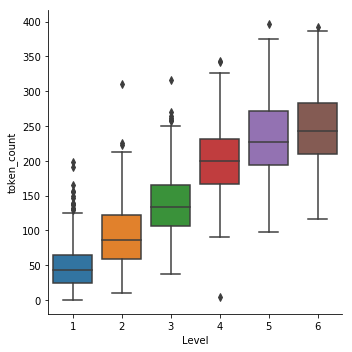

In [40]:
# Let's look at general length by level
sns.catplot(x='Level', y='token_count', kind='box', data=cepa_df)

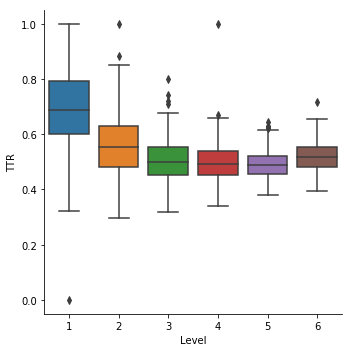

In [41]:
sns.catplot(x='Level', y='TTR', kind='box', data=cepa_df)

This really isn't too surprising! The higher the (perceived) level is, the more students seem to write. Conversely, becuase they're writing more, there's more of a likelihood that they'll repeat their words, especially when compared to much lower levels (1, 2). Of course, TTR tells us more when it's normalized/controlled for length, so maybe we can return to this later.